In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tempfile
import pytz
from datetime import datetime
import pyart
import nexradaws

templocation = tempfile.mkdtemp()

/home/adriano/anaconda3/envs/projectcap394/lib/python3.7/site-packages/botocore/vendored/requests/packages/urllib3/_collections.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, MutableMapping


In [3]:
conn = nexradaws.NexradAwsInterface()

In [4]:
years = conn.get_avail_years()
print(years)

['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [5]:
months = conn.get_avail_months('2013')
print(months)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


In [6]:
days = conn.get_avail_days('2013','05')
print(days)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']


In [7]:
radars = conn.get_avail_radars('2013','05','31')
print(radars)

['DAN1', 'KABR', 'KABX', 'KAKQ', 'KAMA', 'KAMX', 'KAPX', 'KARX', 'KATX', 'KBBX', 'KBGM', 'KBHX', 'KBIS', 'KBLX', 'KBMX', 'KBOX', 'KBRO', 'KBUF', 'KBYX', 'KCAE', 'KCBW', 'KCBX', 'KCCX', 'KCLE', 'KCLX', 'KCRP', 'KCXX', 'KCYS', 'KDAX', 'KDDC', 'KDFX', 'KDGX', 'KDLH', 'KDMX', 'KDOX', 'KDTX', 'KDVN', 'KEAX', 'KEMX', 'KENX', 'KEOX', 'KEPZ', 'KESX', 'KEVX', 'KEWX', 'KEYX', 'KFCX', 'KFDR', 'KFFC', 'KFSD', 'KFSX', 'KFTG', 'KFWS', 'KGGW', 'KGJX', 'KGLD', 'KGRB', 'KGRK', 'KGRR', 'KGSP', 'KGWX', 'KGYX', 'KHDX', 'KHGX', 'KHNX', 'KHPX', 'KHTX', 'KICT', 'KICX', 'KILN', 'KILX', 'KIND', 'KINX', 'KIWA', 'KIWX', 'KJAX', 'KJGX', 'KJKL', 'KLBB', 'KLCH', 'KLGX', 'KLIX', 'KLNX', 'KLOT', 'KLRX', 'KLSX', 'KLTX', 'KLVX', 'KLWX', 'KLZK', 'KMAF', 'KMAX', 'KMBX', 'KMHX', 'KMKX', 'KMLB', 'KMOB', 'KMPX', 'KMQT', 'KMRX', 'KMSX', 'KMTX', 'KMUX', 'KMVX', 'KMXX', 'KNKX', 'KNQA', 'KOAX', 'KOHX', 'KOKX', 'KOTX', 'KPAH', 'KPBZ', 'KPDT', 'KPOE', 'KPUX', 'KRAX', 'KRGX', 'KRIW', 'KRLX', 'KRTX', 'KSFX', 'KSGF', 'KSHV', 'KSJT',

In [8]:
availscans = conn.get_avail_scans('2013', '05', '31', 'KTLX')
print("There are {} NEXRAD files available for May 31st, 2013 for the KTLX radar.\n".format(len(availscans)))
print(availscans[0:4])

There are 263 NEXRAD files available for May 31st, 2013 for the KTLX radar.

[<AwsNexradFile object - 2013/05/31/KTLX/KTLX20130531_000358_V06.gz>, <AwsNexradFile object - 2013/05/31/KTLX/KTLX20130531_000834_V06.gz>, <AwsNexradFile object - 2013/05/31/KTLX/KTLX20130531_001311_V06.gz>, <AwsNexradFile object - 2013/05/31/KTLX/KTLX20130531_001747_V06.gz>]


In [9]:
central_timezone = pytz.timezone('US/Central')
radar_id = 'KTLX'
start = central_timezone.localize(datetime(2013,5,31,17,0))
end = central_timezone.localize (datetime(2013,5,31,19,0))
scans = conn.get_avail_scans_in_range(start, end, radar_id)
print("There are {} scans available between {} and {}\n".format(len(scans), start, end))
print(scans[0:4])

There are 26 scans available between 2013-05-31 17:00:00-05:00 and 2013-05-31 19:00:00-05:00

[<AwsNexradFile object - 2013/05/31/KTLX/KTLX20130531_220114_V06.gz>, <AwsNexradFile object - 2013/05/31/KTLX/KTLX20130531_220537_V06.gz>, <AwsNexradFile object - 2013/05/31/KTLX/KTLX20130531_221011_V06.gz>, <AwsNexradFile object - 2013/05/31/KTLX/KTLX20130531_221445_V06.gz>]


In [10]:
results = conn.download(scans[0:4], templocation)

Downloaded KTLX20130531_220537_V06.gz
Downloaded KTLX20130531_221445_V06.gz
Downloaded KTLX20130531_221011_V06.gz
Downloaded KTLX20130531_220114_V06.gz
4 out of 4 files downloaded...0 errors


In [12]:
print(results.success)

[<LocalNexradFile object - /tmp/tmpm0ctjfd9/KTLX20130531_220114_V06.gz>, <LocalNexradFile object - /tmp/tmpm0ctjfd9/KTLX20130531_220537_V06.gz>, <LocalNexradFile object - /tmp/tmpm0ctjfd9/KTLX20130531_221011_V06.gz>, <LocalNexradFile object - /tmp/tmpm0ctjfd9/KTLX20130531_221445_V06.gz>]


In [13]:
for scan in results.iter_success():
    print ("{} volume scan time {}".format(scan.radar_id,scan.scan_time))

KTLX volume scan time 2013-05-31 22:01:14+00:00
KTLX volume scan time 2013-05-31 22:05:37+00:00
KTLX volume scan time 2013-05-31 22:10:11+00:00
KTLX volume scan time 2013-05-31 22:14:45+00:00


In [15]:
print("{} downloads failed.".format(results.failed_count))
print(results.failed)

0 downloads failed.
[]


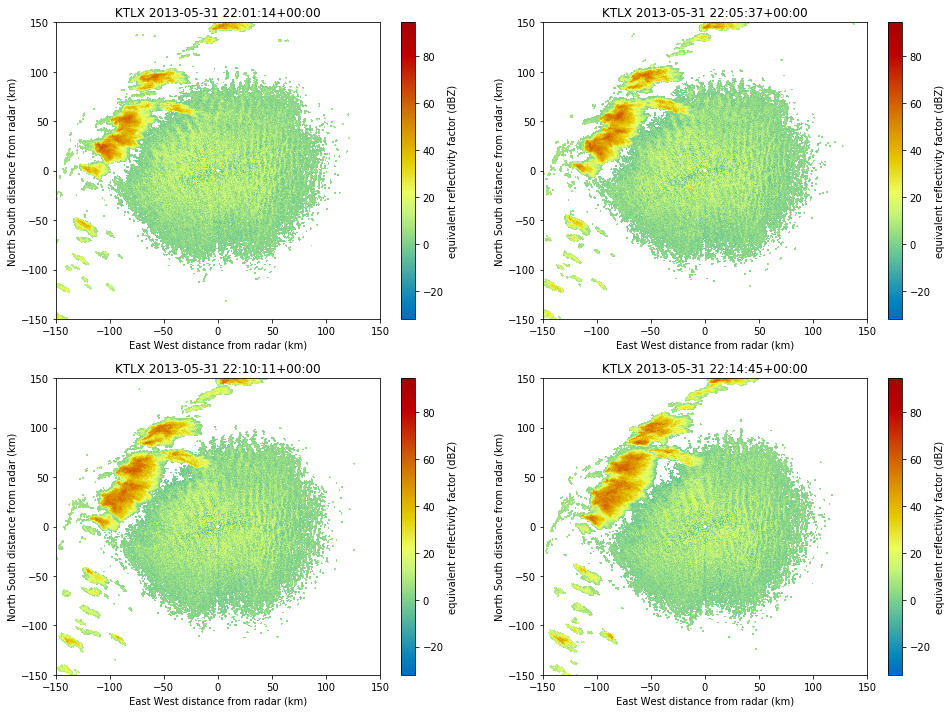

In [17]:
fig = plt.figure(figsize=(16,12))
for i,scan in enumerate(results.iter_success(),start=1):
    ax = fig.add_subplot(2,2,i)
    radar = scan.open_pyart()
    display = pyart.graph.RadarDisplay(radar)
    display.plot('reflectivity',0,ax=ax,title="{} {}".format(scan.radar_id,scan.scan_time))
    display.set_limits((-150, 150), (-150, 150), ax=ax)

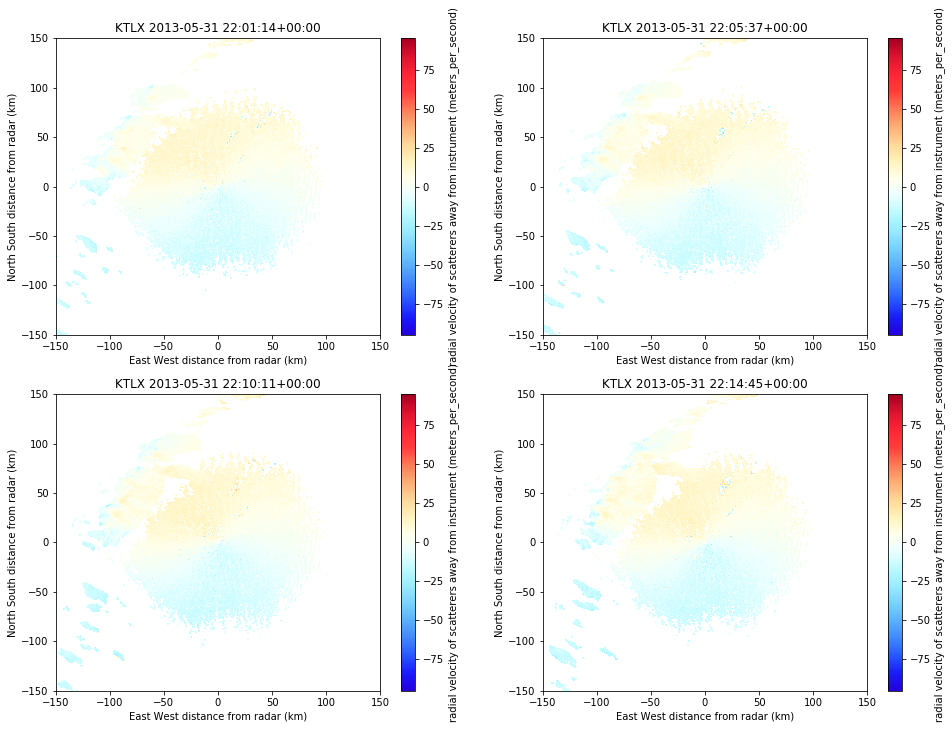

In [18]:
fig = plt.figure(figsize=(16,12))
for i,scan in enumerate(results.iter_success(),start=1):
    ax = fig.add_subplot(2,2,i)
    radar = scan.open_pyart()
    display = pyart.graph.RadarDisplay(radar)
    display.plot('velocity',1,ax=ax,title="{} {}".format(scan.radar_id,scan.scan_time))
    display.set_limits((-150, 150), (-150, 150), ax=ax)

In [50]:
!conda install -c conda-forge -y pytables

Solving environment: done

## Package Plan ##

  environment location: /home/adriano/anaconda3/envs/projectcap394

  added / updated specs:
    - pytables


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blosc-1.17.0               |       he1b5a44_0         861 KB  conda-forge
    lzo-2.10                   |    h14c3975_1000         319 KB  conda-forge
    mock-3.0.5                 |           py37_0          44 KB  conda-forge
    numexpr-2.6.9              |py37h637b7d7_1000         194 KB  conda-forge
    pytables-3.5.2             |   py37h9f153d1_1         1.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be INSTALLED:

  blosc              conda-forge/linux-64::blosc-1.17.0-he1b5a44_0
  lzo                conda-forge/linux-64::lzo-2.10-h14c3975_100

In [59]:
import pandas as pd
file = pd.read_hdf('RADL08061720140103031200.HDF5')
file

ValueError: No dataset in HDF5 file.